In [1]:
project_dir = "~/ben_lustre/current_projects/kidney_glomTI_response"
setwd(project_dir)
suppressPackageStartupMessages(source("https://raw.githubusercontent.com/bjstewart1/helpful_singlecell/main/functions.R"))
clean_theme <- theme_bw() + theme(axis.text = element_text(color = "black"), axis.title = element_text(color = "black"))
library(ggplot2)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [2]:
perfusion_physiology = read.csv("./data/perfusion_physiology/perfusion_timeseries_physiology.csv")

In [3]:
head(perfusion_physiology)
colnames(perfusion_physiology) = c('kidney', 'timepoint', 'RBF', 'RBFper100g','pump_speed', 'pressure', 'temperature', 'urine_output', 'timepoint_relative')

,Kidney,Timepoint,RBF,RBF.ml.min.100g,Pump.speed,Pressure,temperature,urine_output,warmuptime
,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,K281,0,200,96.15,1450,80,36.0,NA,-60
2,K281,5,270,129.81,1450,76,36.1,NA,-55
3,K281,10,160,76.92,1450,83,35.6,NA,-50
4,K281,15,90,43.27,1450,87,35.0,NA,-45
5,K281,20,90,43.27,1450,87,34.9,NA,-40
6,K281,25,90,43.27,1450,83,34.9,NA,-35


In [4]:
options(repr.plot.width = 15, repr.plot.height = 3)
rbf = ggplot(perfusion_physiology, aes(x = timepoint_relative, y = RBFper100g)) + geom_line() + geom_point() + facet_wrap(~kidney, ncol = 7) + theme_minimal()

In [5]:
pressure = ggplot(perfusion_physiology, aes(x = timepoint_relative, y = pressure)) + 
geom_line() + geom_point() + facet_wrap(~kidney, ncol = 7) + theme_minimal() + ylim(0, 100)

In [6]:
#get cumulative urine output
perfusion_physiology$cumulative_urine = 0
for(x in unique(perfusion_physiology$kidney)){
urineoutput = perfusion_physiology[perfusion_physiology$kidney %in% x, 'urine_output']
urineoutput[is.na(urineoutput)] = 0
cumulative_urineoutput = cumsum(urineoutput)
perfusion_physiology$cumulative_urine[perfusion_physiology$kidney %in% x] = cumulative_urineoutput
}

In [14]:
mean(perfusion_physiology[perfusion_physiology$timepoint_relative == 180, 'cumulative_urine'])
sd(perfusion_physiology[perfusion_physiology$timepoint_relative == 180, 'cumulative_urine'])

[1] 77.74286

[1] 53.33788

In [61]:
cumurine = ggplot(perfusion_physiology, aes(x = timepoint_relative, y = cumulative_urine)) + 
geom_line() + geom_point() + facet_wrap(~kidney, ncol = 7) + theme_minimal() 

In [62]:
temp = ggplot(perfusion_physiology, aes(x = timepoint_relative, y = temperature)) + 
geom_line() + geom_point() + facet_wrap(~kidney, ncol = 7) + theme_minimal() 

png 
  2

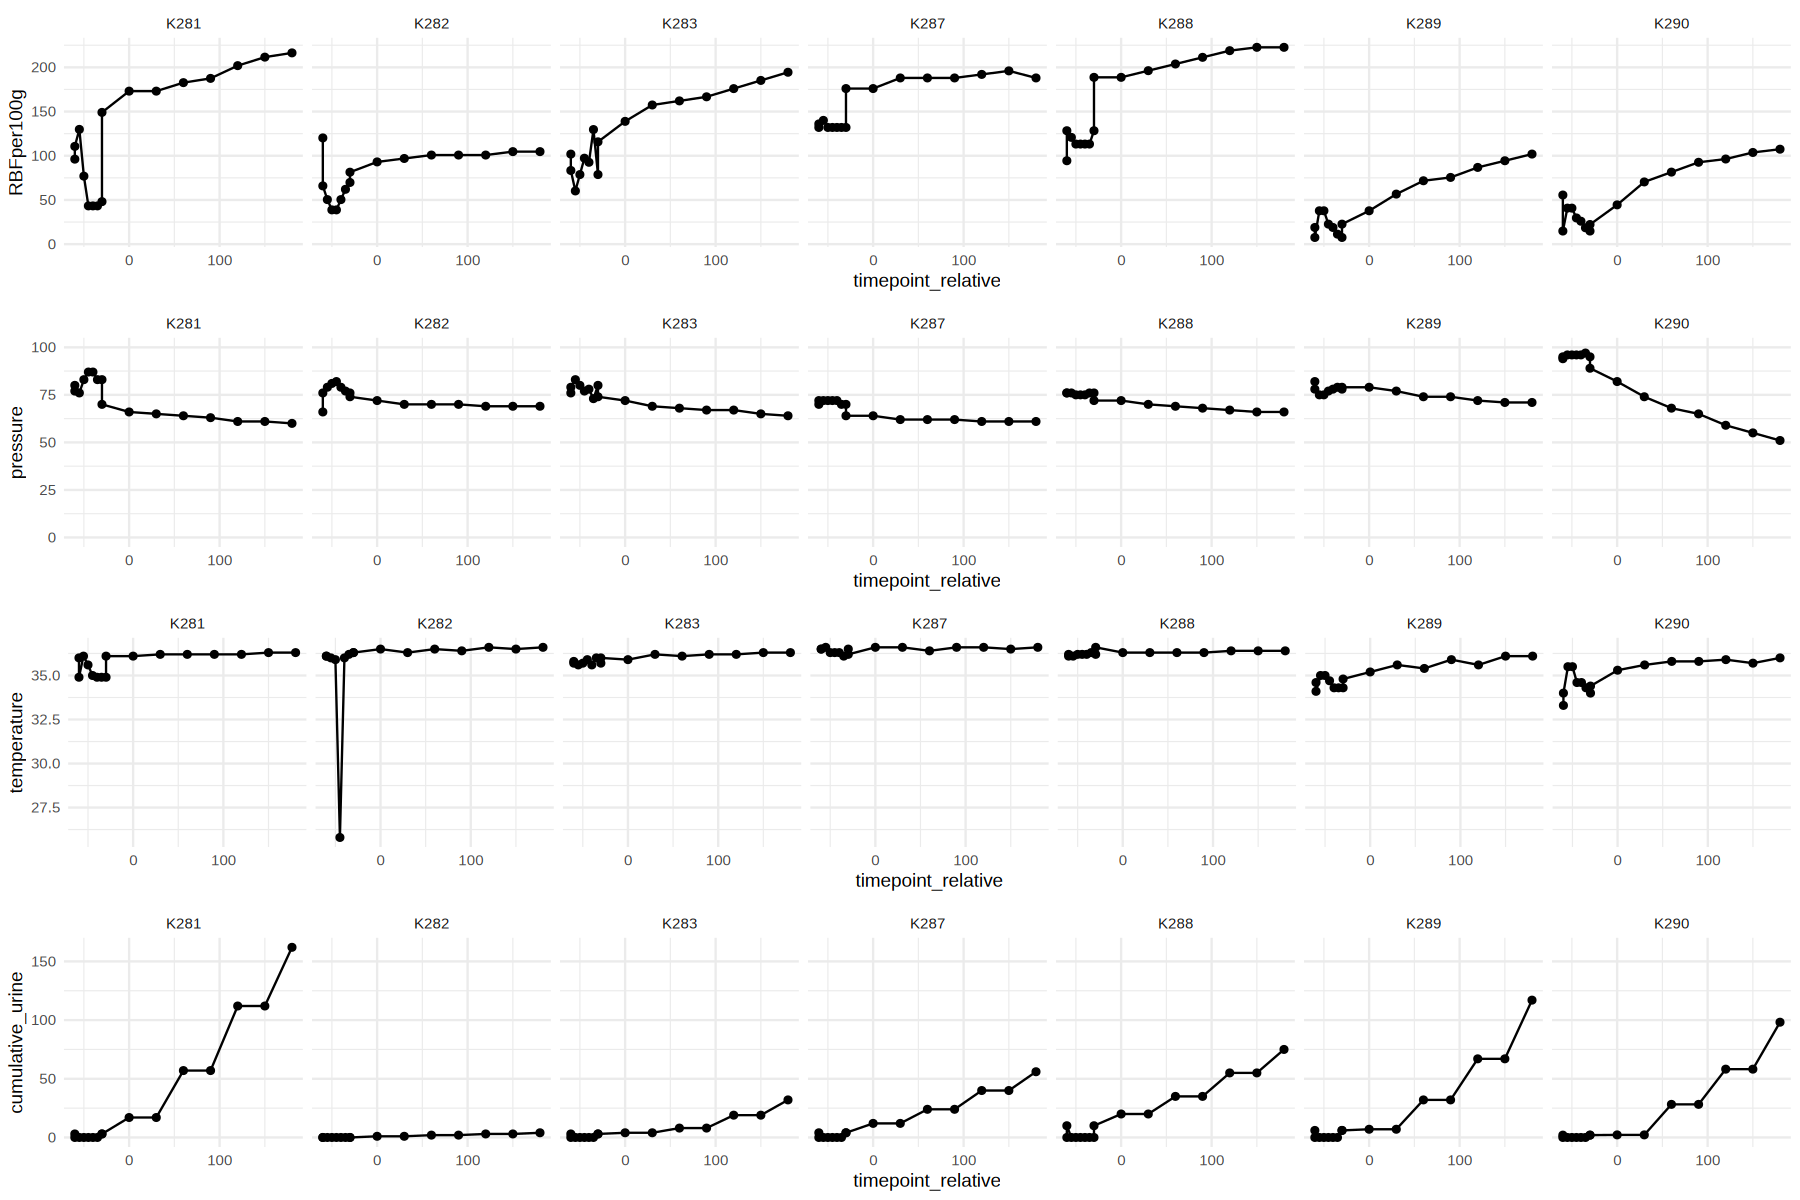

In [67]:
options(repr.plot.height = 10, repr.plot.width = 15 )
cowplot::plot_grid(plotlist = list(rbf, pressure, temp, cumurine), nrow = 4)

pdf(width = 15, height = 10, './figures/renal_physiology.pdf')
cowplot::plot_grid(plotlist = list(rbf, pressure, temp, cumurine), nrow = 4)
dev.off()